In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv("./data/student_scores.csv")

# display the first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# check the shape of the DataFrame (rows, columns)
data.shape

(25, 2)

/Applications/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


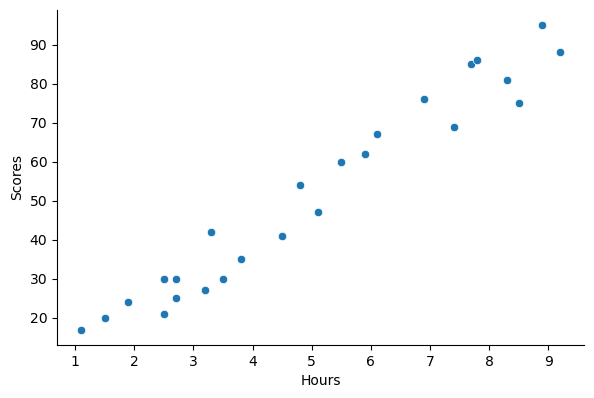

In [4]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Hours'], y_vars='Scores', height=4, aspect=1.5) 

In [5]:
# create a features (X) and targets (y)
X = data[['Hours']]
y = data[['Scores']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18, 1)
(18, 1)
(7, 1)
(7, 1)


In [7]:
# instantiate the model
linreg = LinearRegression()

linreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [8]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [9]:
# print the intercept and coefficients
print("Y-intercept: ",linreg.intercept_)
print("Coefficient: ",linreg.coef_)

Y-intercept:  [1.93220425]
Coefficient:  [[9.94167834]]


In [10]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [11]:
# calculate MAE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.509204328368805


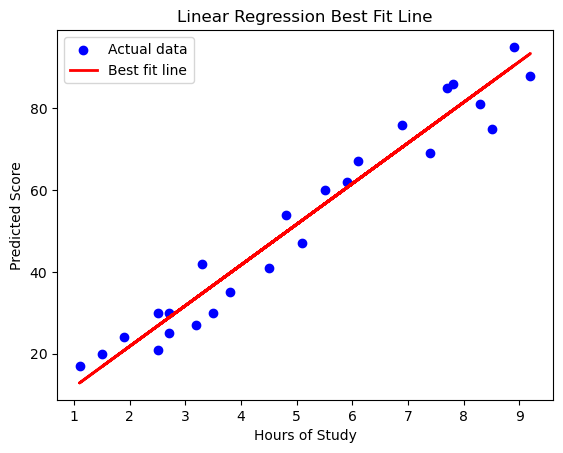

In [12]:
# Predict the values based on the training data
y_pred = linreg.predict(X)

# Scatter plot of the actual data points
plt.scatter(X, y, color='blue', label='Actual data')

# Plotting the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Best fit line')

# Adding labels and title
plt.xlabel('Hours of Study')
plt.ylabel('Predicted Score')
plt.title('Linear Regression Best Fit Line')
plt.legend()

# Show the plot
plt.show()
